In [1]:
#loaded necessary imports
from dotenv import load_dotenv
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import datetime as dt
import seaborn as sns
import requests
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
import panel as pn
pn.extension('plotly')
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from matplotlib.pylab import date2num

# Pulling Data From Yahoo Finance API

In [40]:
#extracting data from Yahoo Finance API
tickers = ['BTC-USD','ETH-USD', 'XRP-USD']
all_data = pd.DataFrame()
test_data = pd.DataFrame()
no_data = []

for i in tickers:
    try:
        test_data = pdr.get_data_yahoo(i, start = dt.datetime(2021,1,1), end = dt.date.today())
        test_data['symbol'] = i
        all_data = all_data.append(test_data)
    except:
        no_data.append(i)

In [41]:
#Creating Return column
all_data['return'] = all_data.groupby('symbol')['Close'].pct_change() 

In [42]:
#Checking for NaNs
all_data.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
symbol       0
return       3
dtype: int64

In [43]:
#Removing NaNs
all_data = all_data.dropna()

In [44]:
#Rechecking for NaNs
all_data.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
symbol       0
return       0
dtype: int64

In [45]:
#Seperating data by tickers
btc_data = all_data.loc[all_data['symbol'] == 'BTC-USD']
eth_data = all_data.loc[all_data['symbol'] == 'ETH-USD']
xrp_data = all_data.loc[all_data['symbol'] == 'XRP-USD']

In [46]:
#Showing Data
btc_data

High           Low          Open         Close  \
Date                                                                 
2021-01-02  33155.117188  29091.181641  29376.455078  32127.267578   
2021-01-03  34608.558594  32052.316406  32129.408203  32782.023438   
2021-01-04  33440.218750  28722.755859  32810.949219  31971.914062   
2021-01-05  34437.589844  30221.187500  31977.041016  33992.429688   
2021-01-06  36879.699219  33514.035156  34013.613281  36824.363281   
2021-01-07  40180.367188  36491.191406  36833.875000  39371.042969   
2021-01-08  41946.738281  36838.636719  39381.765625  40797.609375   
2021-01-09  41436.351562  38980.875000  40788.640625  40254.546875   
2021-01-10  41420.191406  35984.628906  40254.218750  38356.441406   
2021-01-11  38346.531250  30549.599609  38346.531250  35566.656250   
2021-01-12  36568.527344  32697.976562  35516.359375  33922.960938   
2021-01-13  37599.960938  32584.667969  33915.121094  37316.359375   
2021-01-14  39966.406250  36868.562500  37325.109375  39187.328125   
2021-01-15  39577.710938  34659.589844  39156.707031  36825.367188   
2021-01-16  37864.367188  35633.554688  36821.648438  36178.140625   
2021-01-17  36722.351562  34069.320312  36163.648438  35791.277344   
2021-01-18  37299.285156  34883.843750  35792.238281  36630.074219   
2021-01-19  37755.890625  36069.804688  36642.234375  36069.804688   
2021-01-20  36378.328125  33570.476562  36050.113281  35547.750000   
2021-01-21  35552.679688  30250.750000  35549.398438  30825.699219   
2021-01-22  33811.851562  28953.373047  30817.625000  33005.761719   
2021-01-23  33360.976562  31493.160156  32985.757812  32067.642578   
2021-01-24  32944.007812  31106.685547  32064.376953  32289.378906   
2021-01-25  34802.742188  32087.787109  32285.798828  32366.392578   
2021-01-26  32794.550781  31030.265625  32358.613281  32569.849609   
2021-01-27  32564.029297  29367.138672  32564.029297  30432.546875   
2021-01-28  31891.300781  30023.207031  30441.041016  31649.605469   
2021-01-29  38406.261719  32064.814453  34318.671875  34316.386719   
2021-01-30  34834.707031  32940.187500  34295.933594  34269.523438   
2021-01-31  34288.332031  32270.175781  34270.878906  33114.359375   
...                  ...           ...           ...           ...   
2021-06-22  34753.410156  31772.632812  32515.714844  33723.027344   
2021-06-23  35228.851562  32385.214844  33682.800781  34662.437500   
2021-06-24  35487.246094  31350.884766  34659.105469  31637.779297   
2021-06-25  32637.587891  30184.501953  31594.664062  32186.277344   
2021-06-26  34656.128906  32071.757812  32287.523438  34649.644531   
2021-06-27  35219.890625  33902.074219  34679.121094  34434.335938   
2021-06-28  36542.109375  34252.484375  34475.558594  35867.777344   
2021-06-29  36074.757812  34086.152344  35908.386719  35040.835938   
2021-06-30  35035.984375  32883.781250  35035.984375  33572.117188   
2021-07-01  33939.589844  32770.679688  33549.601562  33897.046875   
2021-07-02  34909.261719  33402.695312  33854.421875  34668.546875   
2021-07-03  35937.566406  34396.476562  34665.566406  35287.781250   
2021-07-04  35284.343750  33213.660156  35284.343750  33746.003906   
2021-07-05  35038.535156  33599.917969  33723.507812  34235.195312   
2021-07-06  34997.664062  33839.289062  34225.679688  33855.328125   
2021-07-07  33907.906250  32133.183594  33889.605469  32877.371094   
2021-07-08  34042.292969  32318.880859  32861.671875  33798.011719   
2021-07-09  34209.070312  33116.011719  33811.242188  33520.519531   
2021-07-10  34584.703125  33346.738281  33509.078125  34240.187500   
2021-07-11  34592.156250  32697.308594  34254.015625  33155.847656   
2021-07-12  33327.101562  32261.419922  33125.468750  32702.025391   
2021-07-13  33061.398438  31639.125000  32723.845703  32822.347656   
2021-07-14  33159.640625  31175.708984  32827.875000  31780.730469   
2021-07-15  32218.406250  31100.673828  31841.550781  31421.539062   
2021-07-16  31935.945312  3122

In [47]:
eth_data

High          Low         Open        Close        Volume  \
Date                                                                           
2021-01-02   786.798462   718.109497   730.402649   774.534973  1.974077e+10   
2021-01-03  1006.565002   771.561646   774.511841   975.507690  4.520046e+10   
2021-01-04  1153.189209   912.305359   977.058838  1040.233032  5.694599e+10   
2021-01-05  1129.371460   986.811279  1041.498779  1100.006104  4.153593e+10   
2021-01-06  1209.428589  1064.233398  1101.005005  1207.112183  4.469991e+10   
2021-01-07  1282.579590  1167.443115  1208.078369  1225.678101  4.046803e+10   
2021-01-08  1273.827515  1076.081543  1225.967896  1224.197144  4.433483e+10   
2021-01-09  1303.871826  1182.270386  1223.740479  1281.077271  3.323311e+10   
2021-01-10  1347.926147  1194.715576  1280.871094  1262.246704  4.061694e+10   
2021-01-11  1261.622925   924.922607  1261.622925  1090.145386  6.073363e+10   
2021-01-12  1149.240234  1012.764160  1088.526733  1043.434570  3.749460e+10   
2021-01-13  1134.338501   994.549072  1043.740967  1130.739380  3.010979e+10   
2021-01-14  1244.163086  1093.060791  1130.231201  1218.453003  3.341092e+10   
2021-01-15  1250.505859  1090.721069  1221.877197  1171.834595  3.597204e+10   
2021-01-16  1290.053589  1157.623779  1171.443115  1233.537598  3.231924e+10   
2021-01-17  1265.644653  1174.388550  1233.453369  1230.172241  2.925803e+10   
2021-01-18  1259.450073  1187.311035  1230.313232  1257.279541  2.581746e+10   
2021-01-19  1432.300049  1254.522949  1257.434570  1377.295898  4.719594e+10   
2021-01-20  1405.744141  1243.299927  1375.248413  1382.274048  4.678403e+10   
2021-01-21  1382.684448  1098.476196  1382.684448  1121.570923  4.593246e+10   
2021-01-22  1271.687622  1046.596558  1118.889038  1236.512207  4.391834e+10   
2021-01-23  1272.151123  1200.893311  1235.267944  1230.990601  2.725390e+10   
2021-01-24  1395.111328  1225.274048  1231.210571  1391.609375  3.641816e+10   
2021-01-25  1467.784912  1304.973999  1390.639893  1324.414795  4.356578e+10   
2021-01-26  1376.085083  1253.340332  1323.741699  1357.058105  4.157292e+10   
2021-01-27  1368.074097  1215.311279  1358.333374  1253.187134  3.939442e+10   
2021-01-28  1321.613037  1226.173950  1251.279785  1298.101807  3.979048e+10   
2021-01-29  1428.981201  1292.240112  1369.086792  1382.522827  5.361196e+10   
2021-01-30  1402.399780  1328.529053  1382.231934  1376.115479  3.061657e+10   
2021-01-31  1378.916016  1288.501587  1376.823608  1314.986206  2.519885e+10   
...                 ...          ...          ...          ...           ...   
2021-06-22  2043.530396  1827.571533  1878.625000  1989.736328  2.840866e+10   
2021-06-23  2032.339355  1887.432007  1968.957397  1988.456299  2.027285e+10   
2021-06-24  2017.759521  1794.400391  1989.215820  1813.217285  2.277433e+10   
2021-06-25  1850.179810  1719.559448  1810.884277  1829.239258  2.063754e+10   
2021-06-26  1979.958130  1811.245850  1830.996948  1978.894653  1.988547e+10   
2021-06-27  2139.805420  1963.615479  1981.386475  2079.657471  2.551460e+10   
2021-06-28  2242.238770  2076.240234  2083.448730  2160.768311  2.481512e+10   
2021-06-29  2282.989014  2090.760742  2164.216309  2274.547607  2.582806e+10   
2021-06-30  2274.397461  2081.081055  2274.397461  2113.605469  2.906170e+10   
2021-07-01  2155.596436  2021.824829  2109.892578  2150.040283  3.179621e+10   
2021-07-02  2237.567139  2117.590088  2150.834961  2226.114258  1.743336e+10   
2021-07-03  2384.286865  2190.837646  2226.550293  2321.724121  1.878711e+10   
2021-07-04  2321.922852  2163.041504  2321.922852  2198.582520  2.010379e+10   
2021-07-05  2346.294922  2197.919434  2197.919434  2324.679443  2.089186e+10   
2021-07-06  2403.773438  2298.026855  2323.208496  2315.161865  2.239835e+10   
2021-07-07  2324.006836  2089.414307  2317.949219  2120.026367  2.318812e+10   
2021-07-08  2185.376221  2051.066650  2115.573975  2146.692383  2.302957e+10   
2021-07-09  2190.12

In [48]:
xrp_data

High       Low      Open     Close        Volume  Adj Close  \
Date                                                                          
2021-01-02  0.238388  0.215816  0.237670  0.221655  4.773659e+09   0.221655   
2021-01-03  0.237741  0.217167  0.221744  0.225848  5.109899e+09   0.225848   
2021-01-04  0.256477  0.219722  0.226038  0.236677  6.141918e+09   0.236677   
2021-01-05  0.241251  0.221602  0.236636  0.226750  5.378492e+09   0.226750   
2021-01-06  0.269158  0.223464  0.226866  0.250895  7.552727e+09   0.250895   
2021-01-07  0.365296  0.247810  0.250926  0.326002  1.595505e+10   0.326002   
2021-01-08  0.345916  0.291539  0.326089  0.323230  9.825830e+09   0.323230   
2021-01-09  0.339859  0.307895  0.323156  0.326916  7.184429e+09   0.326916   
2021-01-10  0.365221  0.292159  0.326833  0.318336  9.647740e+09   0.318336   
2021-01-11  0.317941  0.259468  0.317941  0.288905  9.787289e+09   0.288905   
2021-01-12  0.309924  0.279370  0.288677  0.292123  6.557418e+09   0.292123   
2021-01-13  0.308798  0.286889  0.292028  0.305580  4.831812e+09   0.305580   
2021-01-14  0.308343  0.284211  0.305536  0.295438  5.277189e+09   0.295438   
2021-01-15  0.301757  0.264747  0.295569  0.280406  4.955409e+09   0.280406   
2021-01-16  0.295191  0.277010  0.280292  0.280188  4.116256e+09   0.280188   
2021-01-17  0.285268  0.270652  0.280067  0.277384  3.488557e+09   0.277384   
2021-01-18  0.287624  0.272637  0.277372  0.284769  3.239113e+09   0.284769   
2021-01-19  0.326188  0.283997  0.284826  0.294314  5.583137e+09   0.294314   
2021-01-20  0.308621  0.281986  0.294219  0.296518  4.528342e+09   0.296518   
2021-01-21  0.306218  0.263124  0.296466  0.268946  4.453463e+09   0.268946   
2021-01-22  0.277843  0.244917  0.268776  0.272799  4.501766e+09   0.272799   
2021-01-23  0.282623  0.266979  0.272611  0.271821  3.018883e+09   0.271821   
2021-01-24  0.277425  0.270216  0.271840  0.273509  2.472432e+09   0.273509   
2021-01-25  0.282417  0.268800  0.273473  0.269089  2.925494e+09   0.269089   
2021-01-26  0.271104  0.259708  0.269049  0.268827  2.790822e+09   0.268827   
2021-01-27  0.268972  0.245532  0.268856  0.251943  2.940937e+09   0.251943   
2021-01-28  0.260304  0.248786  0.251915  0.257278  2.935778e+09   0.257278   
2021-01-29  0.310194  0.260488  0.270530  0.282188  8.031899e+09   0.282188   
2021-01-30  0.489346  0.279825  0.282152  0.440244  2.441747e+10   0.440244   
2021-01-31  0.499702  0.389498  0.437832  0.492314  2.439485e+10   0.492314   
...              ...       ...       ...       ...           ...        ...   
2021-06-22  0.660549  0.523663  0.546944  0.626535  4.239152e+09   0.626535   
2021-06-23  0.691010  0.617382  0.638590  0.672000  2.781916e+09   0.672000   
2021-06-24  0.688469  0.603383  0.672911  0.613323  3.120943e+09   0.613323   
2021-06-25  0.631676  0.582415  0.611586  0.615435  2.458621e+09   0.615435   
2021-06-26  0.651772  0.597642  0.616994  0.646923  2.329301e+09   0.646923   
2021-06-27  0.654445  0.624551  0.648285  0.643746  2.323399e+09   0.643746   
2021-06-28  0.727726  0.642351  0.643941  0.701725  3.325817e+09   0.701725   
2021-06-29  0.713673  0.649456  0.705681  0.706374  3.097077e+09   0.706374   
2021-06-30  0.704785  0.646796  0.704785  0.661180  2.553971e+09   0.661180   
2021-07-01  0.667287  0.634726  0.659890  0.656763  2.061607e+09   0.656763   
2021-07-02  0.683677  0.644653  0.655639  0.672888  1.872820e+09   0.672888   
2021-07-03  0.707783  0.665802  0.673218  0.694945  1.885242e+09   0.694945   
2021-07-04  0.695653  0.648492  0.695653  0.654300  2.076373e+09   0.654300   
2021-07-05  0.679923  0.652676  0.653055  0.665402  1.938959e+09   0.665402   
2021-07-06  0.673307  0.651017  0.665256  0.651575  2.077977e+09   0.651575   
2021-07-07  0.654309  0.612983  0.652691  0.623058  2.348705e+09   0.623058   
2021-07-08  0.644547  0.593660  0.621688  0.636804  2.380083e+09   0.636804   
2021-07-09  0.648174  0.614701  0.637221  0.625463  1.788374e+09  

# Calculating RSI

In [49]:
#RSI FUNCTION
#30 and below is underbought, 70 and above is overbought
#https://www.roelpeters.be/many-ways-to-calculate-the-rsi-in-python-pandas/
def rsi(df, periods = 14, ema = True):
    """
    Returns a pd.Series with the relative strength index.
    """
    close_delta = df['Close'].diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    if ema == True:
	    # Use exponential moving average
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        # Use simple moving average
        ma_up = up.rolling(window = periods, adjust=False).mean()
        ma_down = down.rolling(window = periods, adjust=False).mean()
        
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi

In [50]:
#Calculating RSI for BTC
btc_rsi = rsi(btc_data, periods=14, ema=True)

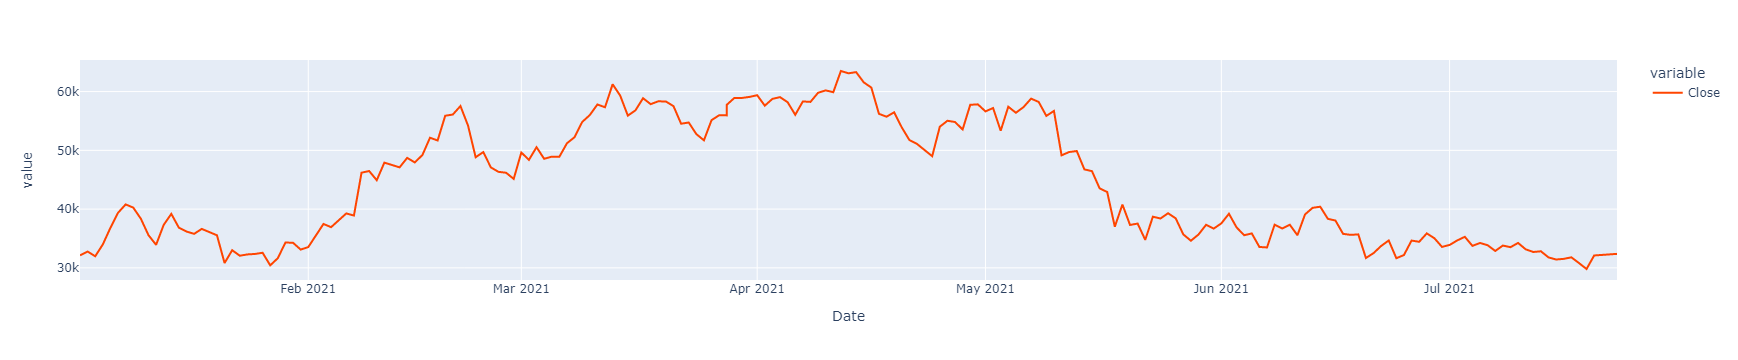

In [51]:
#Showing plot BTC
fig = px.line(btc_data['Close'])
fig.update_traces(line_color='#FF4500')
fig.show()

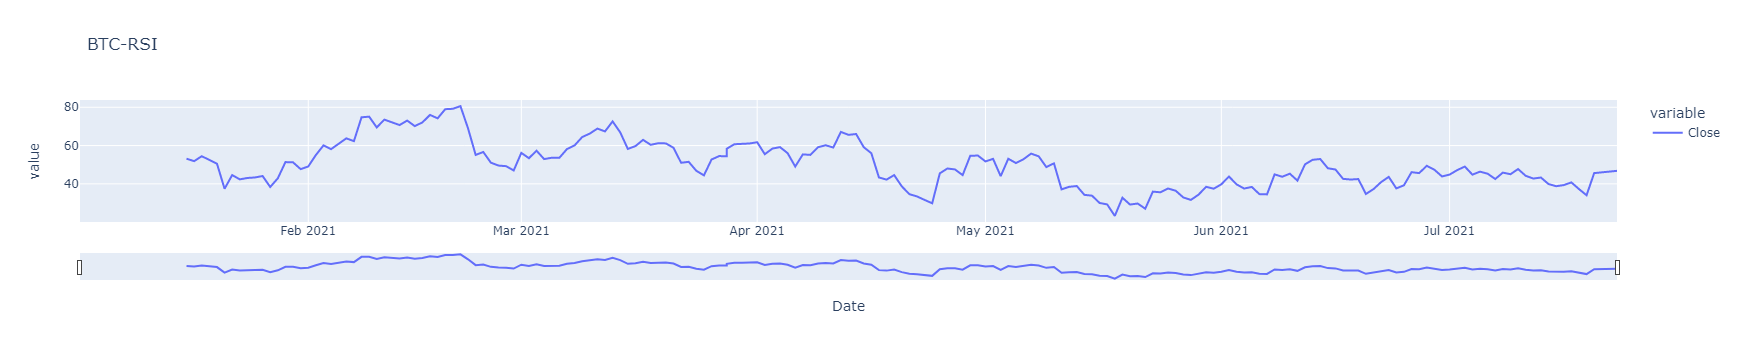

In [52]:
fig2 = px.line(btc_rsi, title='BTC-RSI')
fig2.update_xaxes(rangeslider_visible=True)
fig2.show()

In [53]:
#Calculating RSI for BTC
eth_rsi = rsi(eth_data, periods=14, ema=True)

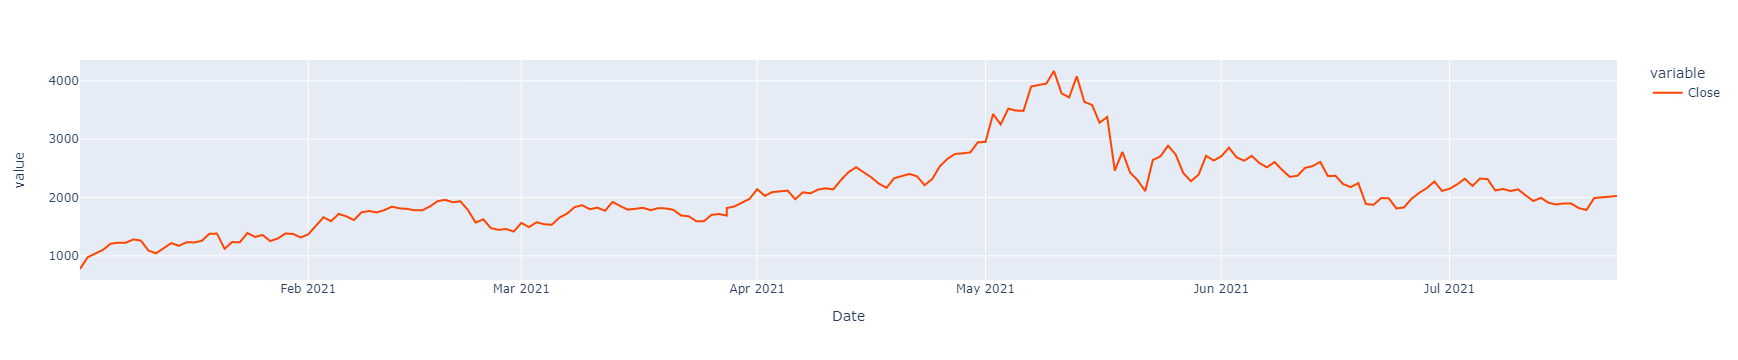

In [54]:
#Showing plot ETH
fig = px.line(eth_data['Close'])
fig.update_traces(line_color='#FF4500')
fig.show()

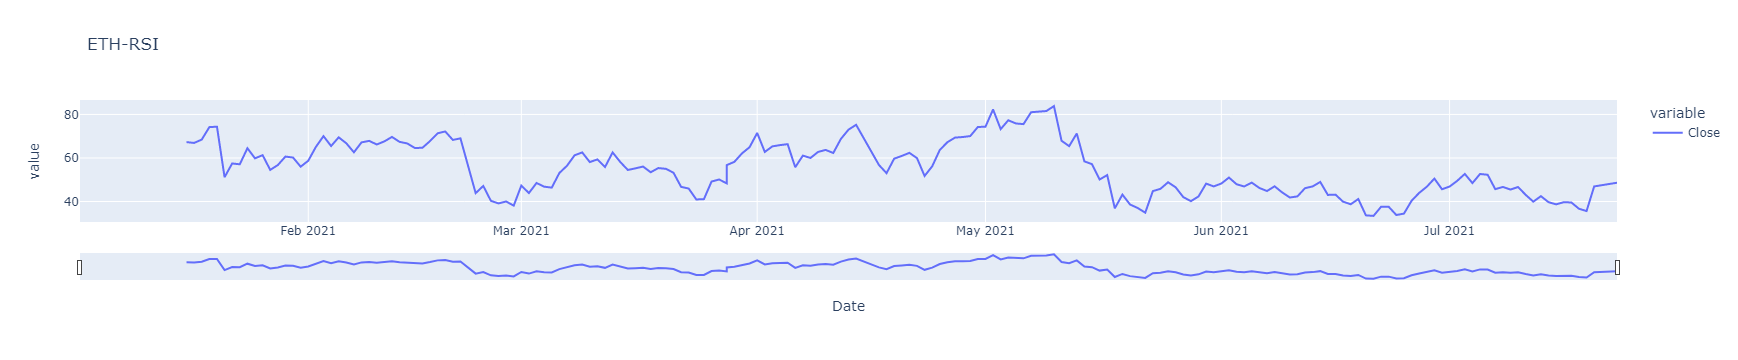

In [55]:
fig2 = px.line(eth_rsi, title='ETH-RSI')
fig2.update_xaxes(rangeslider_visible=True)
fig2.show()

In [56]:
#Calculating RSI for XRP
xrp_rsi = rsi(xrp_data, periods=14, ema=True)

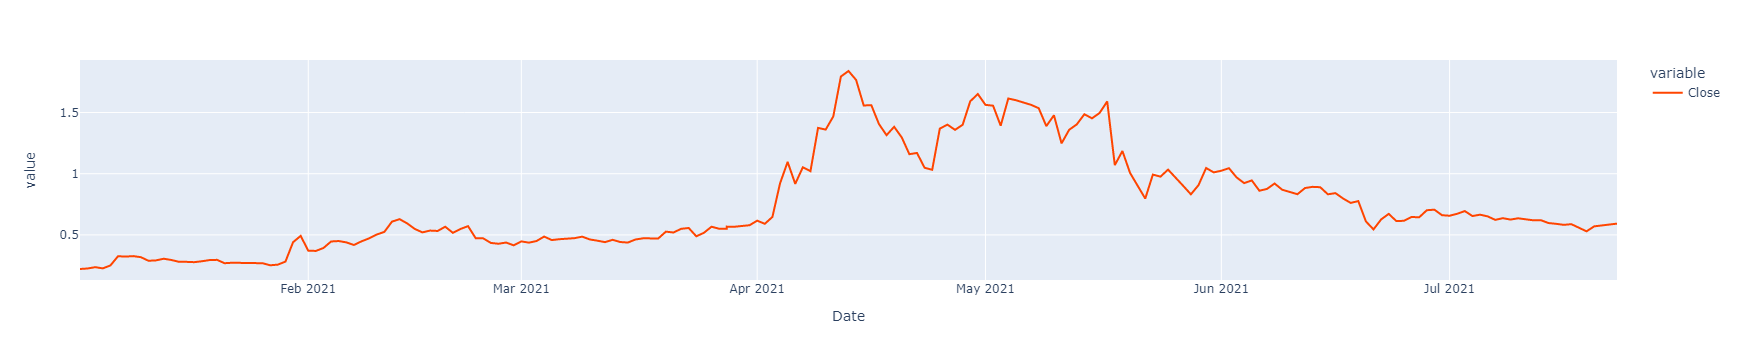

In [57]:
#Showing plot ETH
fig = px.line(xrp_data['Close'])
fig.update_traces(line_color='#FF4500')
fig.show()

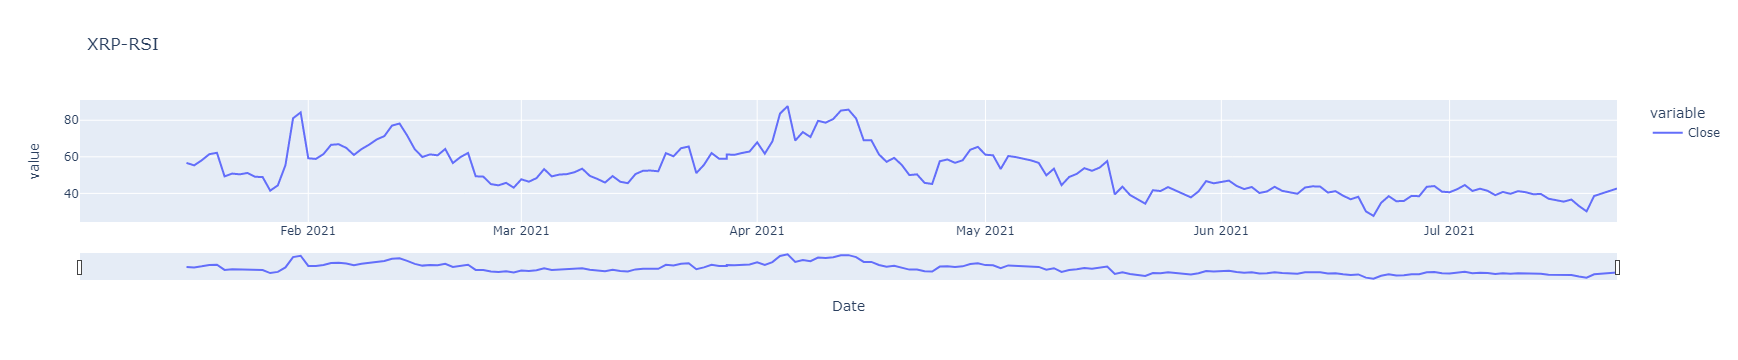

In [58]:
fig2 = px.line(xrp_rsi,title='XRP-RSI')
fig2.update_xaxes(rangeslider_visible=True)
fig2.show()

# Calculating MACD

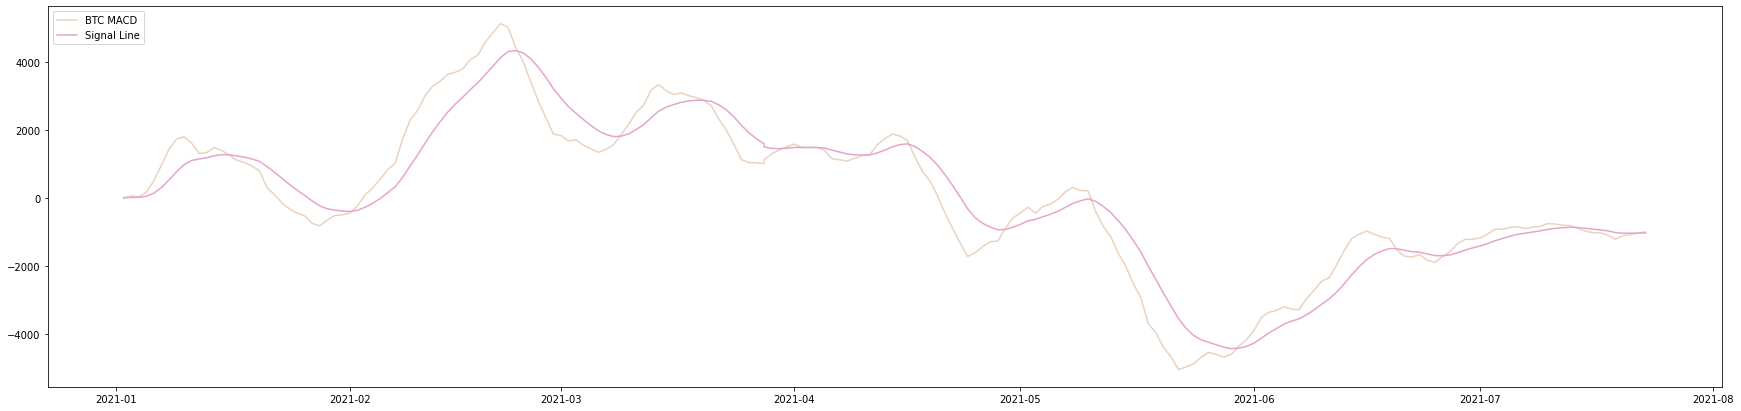

In [59]:
#Moving Average Convergence Divergence MACD, consists of MACD line and signal line
#Calculationg MACD for BTC
#btc_data = btc_data[365:465]
exp1 = btc_data['Close'].ewm(span=12, adjust=False).mean()
exp2 = btc_data['Close'].ewm(span=26, adjust=False).mean()

btc_macd = exp1-exp2
btc_exp3 = btc_macd.ewm(span=9, adjust=False).mean()


plt.figure(figsize=(30,7))
plt.plot(btc_data.index, btc_macd, label='BTC MACD', color = '#EBD2BE')
plt.plot(btc_data.index, btc_exp3, label='Signal Line', color='#E5A4CB')
plt.legend(loc='upper left')
plt.show()

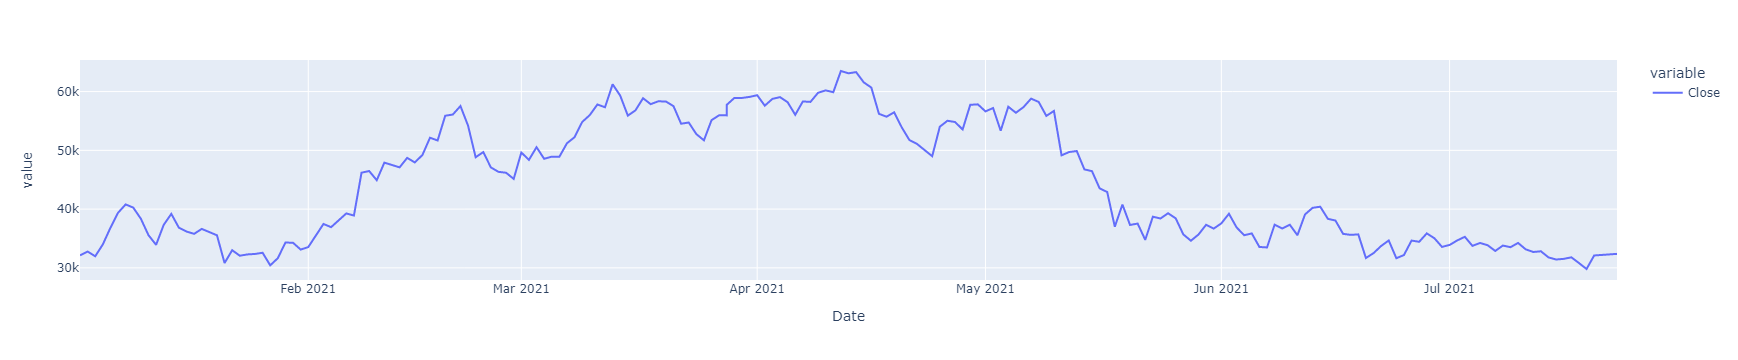

In [60]:
#Showing plot BTC
fig = px.line(btc_data['Close'])
fig.show()

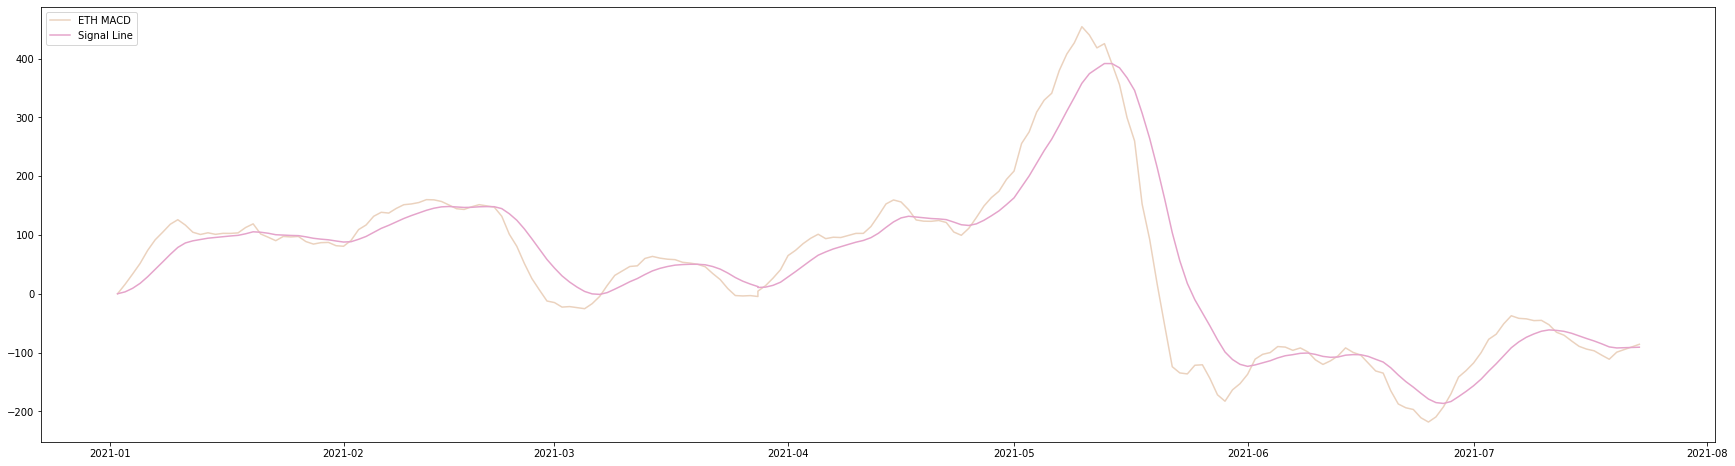

In [61]:
#Calculationg MACD for ETH
#eth_data = eth_data[800:1000]
exp1 = eth_data['Close'].ewm(span=12, adjust=False).mean()
exp2 = eth_data['Close'].ewm(span=26, adjust=False).mean()

eth_macd = exp1-exp2
eth_exp3 = eth_macd.ewm(span=9, adjust=False).mean()


plt.figure(figsize=(30,8))
plt.plot(eth_data.index, eth_macd, label='ETH MACD', color = '#EBD2BE')
plt.plot(eth_data.index, eth_exp3, label='Signal Line', color='#E5A4CB')
plt.legend(loc='upper left')
plt.show()

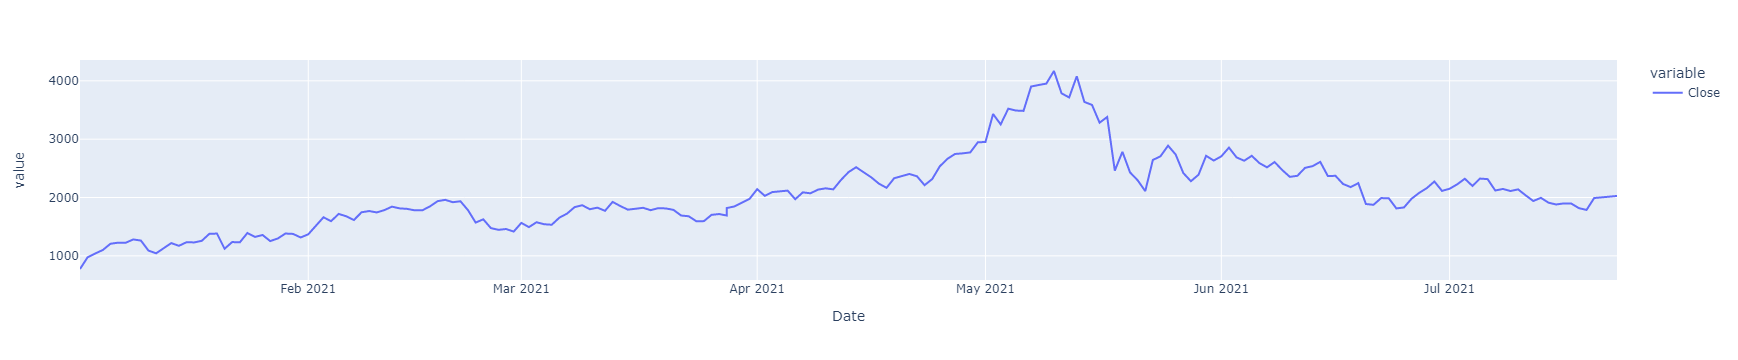

In [62]:
#Showing plot ETH
fig = px.line(eth_data['Close'])
fig.show()

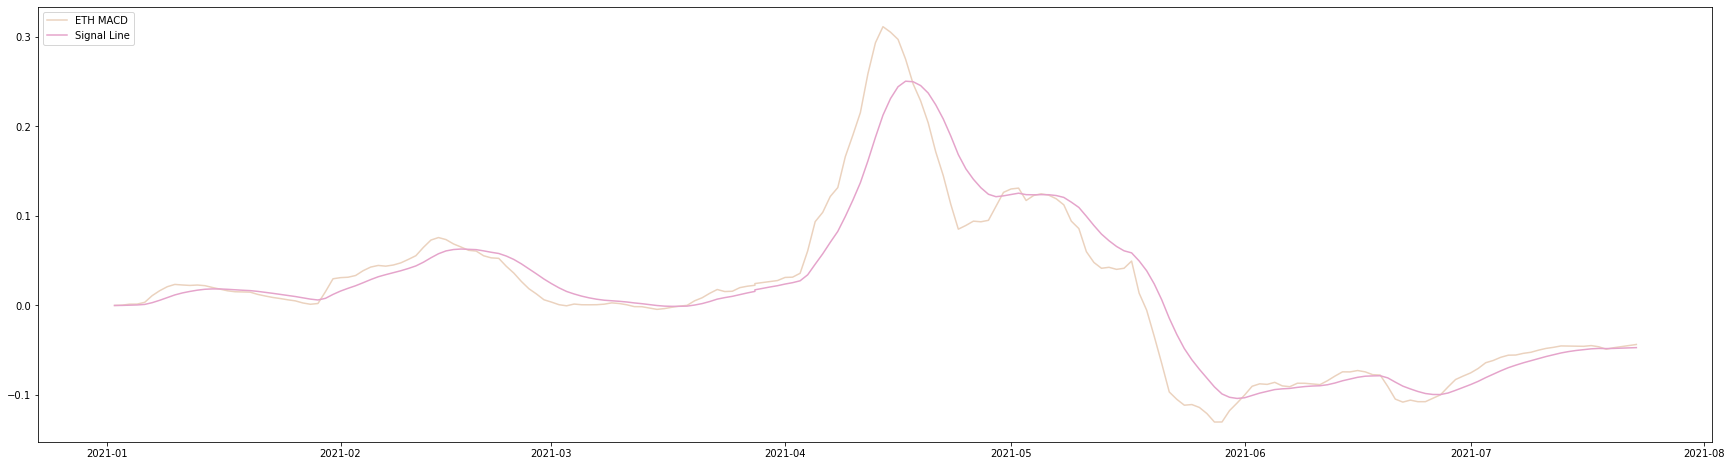

In [63]:
#Calculationg MACD for XRP
#xrp_data = xrp_data[800:1000]
exp1 = xrp_data['Close'].ewm(span=12, adjust=False).mean()
exp2 = xrp_data['Close'].ewm(span=26, adjust=False).mean()

xrp_macd = exp1-exp2
xrp_exp3 = xrp_macd.ewm(span=9, adjust=False).mean()


plt.figure(figsize=(30,8))
plt.plot(xrp_data.index, xrp_macd, label='ETH MACD', color = '#EBD2BE')
plt.plot(xrp_data.index, xrp_exp3, label='Signal Line', color='#E5A4CB')
plt.legend(loc='upper left')
plt.show()

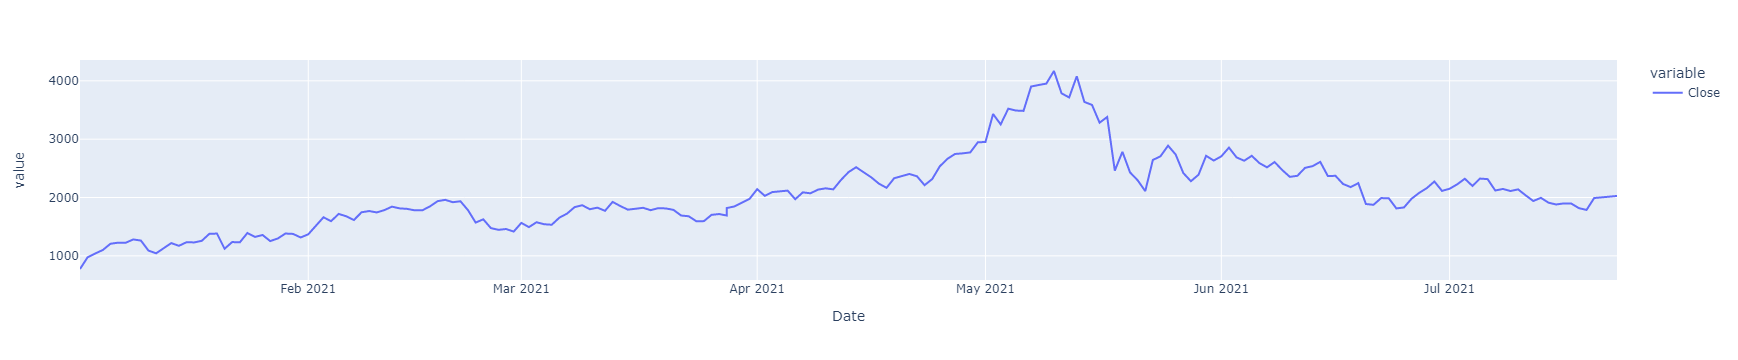

In [64]:
#Showing plot XRP
fig = px.line(eth_data['Close'])
fig.show()

# Bollinger Bands

In [65]:
#Bollinger Bands for BTC
#Bollinger Bands simply add and subtract a standard deviation calculation.
#Standard deviation is a mathematical formula that measures volatility, showing how the stock price can vary from its true value

#btc_data = btc_data[750:900]

btc_data_15MA = btc_data['Close'].transform(lambda x: x.rolling(window=15).mean())
btc_data_SD = btc_data['Close'].transform(lambda x: x.rolling(window=15).std())
btc_data_upperband = btc_data_15MA + 2*btc_data_SD
btc_data_lowerband = btc_data_15MA - 2*btc_data_SD

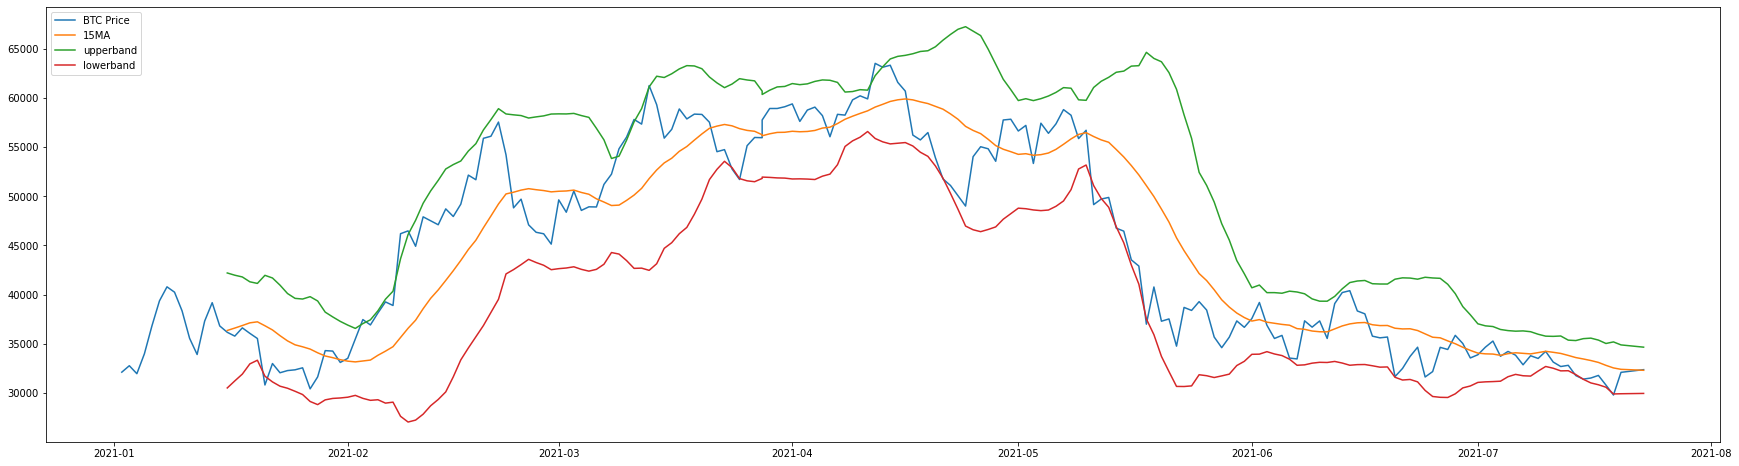

In [66]:
plt.figure(figsize=(30,8))
plt.plot(btc_data.index, btc_data['Close'], label='BTC Price')
plt.plot(btc_data_15MA, label='15MA')
plt.plot(btc_data_upperband, label='upperband')
plt.plot(btc_data_lowerband, label='lowerband')
plt.legend(loc='upper left')
plt.show()

In [67]:
#Bollinger Bands for ETH
#eth_data = eth_data[1000:1350]

eth_data_15MA = eth_data['Close'].transform(lambda x: x.rolling(window=15).mean())
eth_data_SD = eth_data['Close'].transform(lambda x: x.rolling(window=15).std())
eth_data_upperband = eth_data_15MA + 2*eth_data_SD
eth_data_lowerband = eth_data_15MA - 2*eth_data_SD

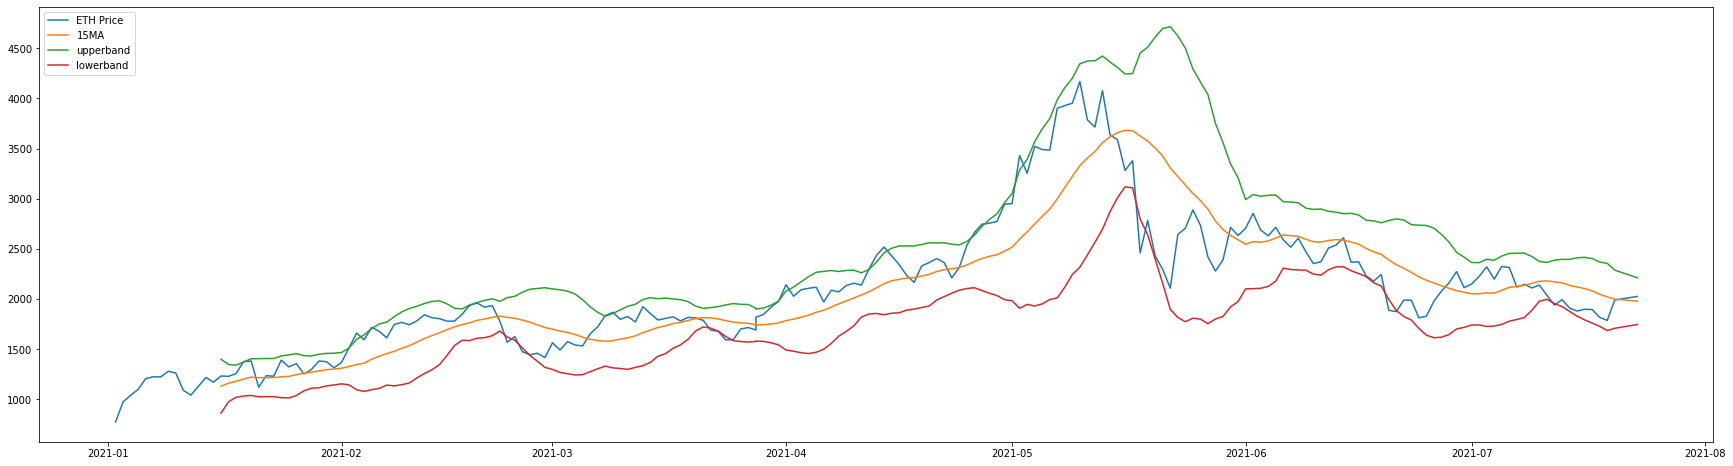

In [68]:
plt.figure(figsize=(30,8))
plt.plot(eth_data.index, eth_data['Close'], label='ETH Price')
plt.plot(eth_data_15MA, label='15MA')
plt.plot(eth_data_upperband, label='upperband')
plt.plot(eth_data_lowerband, label='lowerband')
plt.legend(loc='upper left')
plt.show()

In [69]:
#Bollinger Bands for XRP
#xrp_data = xrp_data[1400:1600]

xrp_data_15MA = xrp_data['Close'].transform(lambda x: x.rolling(window=15).mean())
xrp_data_SD = xrp_data['Close'].transform(lambda x: x.rolling(window=15).std())
xrp_data_upperband = xrp_data_15MA + 2*xrp_data_SD
xrp_data_lowerband = xrp_data_15MA - 2*xrp_data_SD

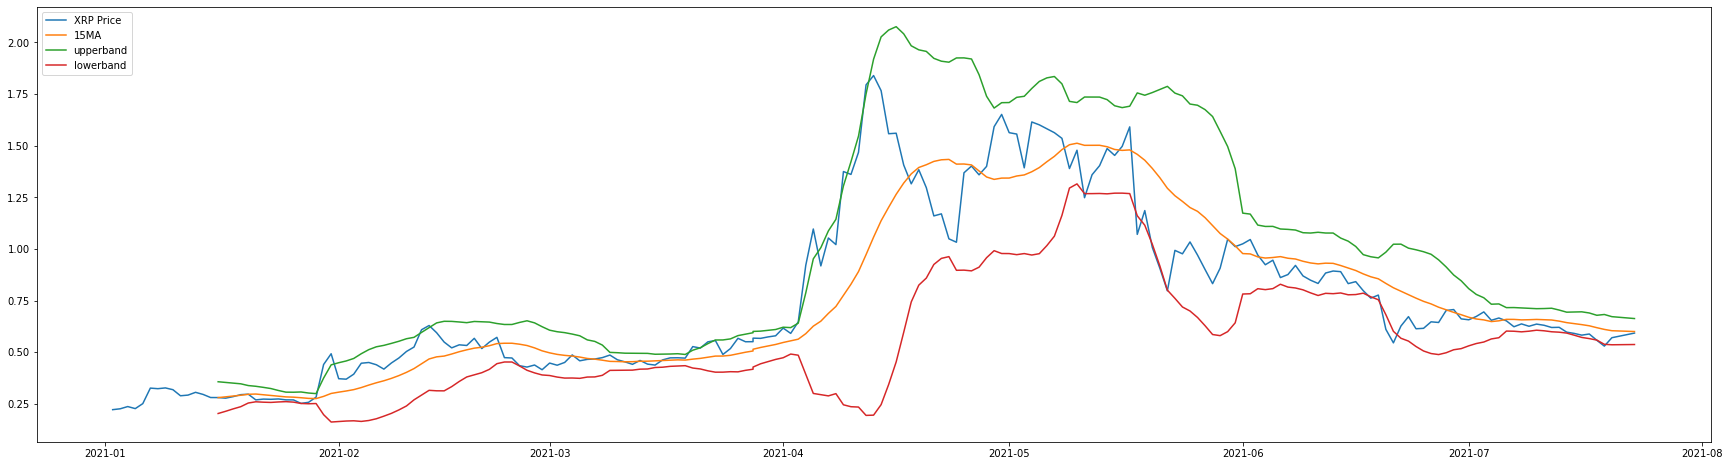

In [70]:
plt.figure(figsize=(30,8))
plt.plot(xrp_data.index, xrp_data['Close'], label='XRP Price')
plt.plot(xrp_data_15MA, label='15MA')
plt.plot(xrp_data_upperband, label='upperband')
plt.plot(xrp_data_lowerband, label='lowerband')
plt.legend(loc='upper left')
plt.show()